In [7]:
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [8]:
# 분석 시간 폴더 경로
folder_path = '../res/'

# 폴더 목록 가져오기
folder_list = os.listdir(folder_path)

In [9]:
# 분석 시간 정보 추출 및 파일 선택
time_info = '20230604_210854'  # 분석 시간에 해당하는 정보를 입력하세요

In [10]:
file_name = f'analysis_result_{time_info}.csv'
file_path = os.path.join(folder_path, time_info, file_name)

# CSV 파일 불러오기
data = pd.read_csv(file_path)

data.head()

,Lot,Wafer,Mask,TestSite,Name,Date,Script ID,Script Version,Script Owner,Operator,...,Column,ErrorFlag,Error description,Analysis Wavelength,Rsq of Ref. spectrum (Nth),Max transmission of Ref. spec. (dB),Rsq of IV,I at -1V [A],I at 1V [A],n_eff_0V
0,HY202103,D07,LION1,DCM_LMZC,MZMCTE_LULAB_450_500,20190715_191703,process LMZC,0.1,D_노정완,ykim,...,-1,0,No Error,1550,0.998434,-7.851665,1.0,2.603237e-08,0.006702,4.187352
1,HY202103,D07,LION1,DCM_LMZC,MZMCTE_LULAB_450_500,20190715_192309,process LMZC,0.1,D_노정완,ykim,...,-3,0,No Error,1550,0.997227,-9.054541,1.0,4.890819e-08,0.006328,4.210818
2,HY202103,D07,LION1,DCM_LMZC,MZMCTE_LULAB_450_500,20190715_202341,process LMZC,0.1,D_노정완,ykim,...,3,0,No Error,1550,0.997172,-9.487260,1.0,4.591942e-08,0.006376,4.208677
3,HY202103,D07,LION1,DCM_LMZC,MZMCTE_LULAB_450_500,20190715_195307,process LMZC,0.1,D_노정완,ykim,...,-3,0,No Error,1550,0.996162,-8.343672,1.0,5.465495e-08,0.006316,4.181636
4,HY202103,D07,LION1,DCM_LMZC,MZMCTE_LULAB_450_500,20190715_194108,process LMZC,0.1,D_노정완,ykim,...,0,0,No Error,1550,0.998104,-8.911875,1.0,4.814727e-08,0.006533,4.209112


Text(0.5, 1.0, 'ErrorFlag-swarm')

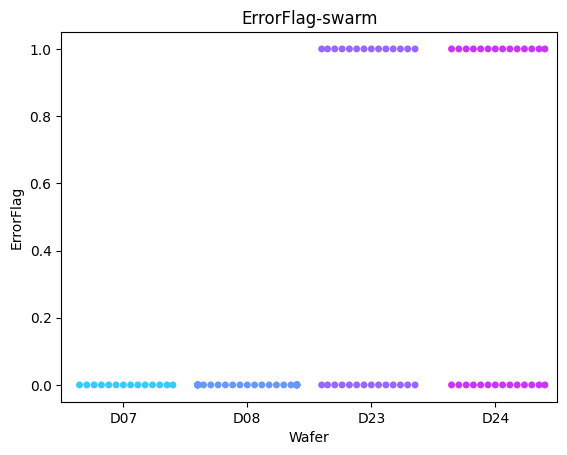

In [13]:
sns.swarmplot(x = 'Wafer', y = 'ErrorFlag', data = data, palette='cool')
plt.title('ErrorFlag-swarm')